# Analyse du dataset TF1

<div class="alert alert-info"><b><i>Contexte : </i></b>Vous êtes Data analyst au sein du groupe TF1. Vous disposez de données présentant des informations telles que les programmes, l’audiance ainsi que les revenus publicitaires. 
<br>Votre <b>mission</b> est de réaliser une première exploration de ces données avec Python.
Utilisez le fichier <b>"DATA_TF1.xlsx"</b> pour réaliser les tâches suivantes en Python, en utilisant (principalement) les bibliothèques Pandas et Numpy. Il s’agit de <b>données fictives</b> générées par une intelligence artificielle.
Assurez-vous de bien commenter votre code pour expliquer vos démarches.</div>

### Partie 1 : Bases du language Python

<div class="alert alert-success">
    <b>Types de Données et Manipulation de Chaînes</b>
</div>

##### Chargement des modules et données

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [135]:
data = pd.read_excel("DATA_TF1.xlsx")

In [136]:
data.head(5)

,ID_programme,Nom_programme,Type_programme,Date_diffusion,Durée,Audience,Part_marché,Cible_principale,Score_qualité,Nombre_publicités,Revenus_publicitaires
0,0,Jacky Show,Documentaire,2023-06-30,157,3228010.0,45.78,Enfants,4.7,39.0,3191.31
1,1,L'Hebdo Show,Divertissement,2023-03-19,64,243902.0,49.56,Adolescents,5.7,7.0,41167.32
2,2,Petites Stars : Le Grand Soir,Documentaire,2023-12-05,160,263143.0,6.17,Enfants,4.8,16.0,36860.05
3,3,Koh-Lanta,Divertissement,2023-10-28,124,3445352.0,9.89,Tout public,9.4,5.0,NaN
4,4,Face à la Une,Documentaire,2023-06-14,115,2194471.0,11.82,Adultes,8.2,NaN,42203.80


In [137]:
data.shape

(100, 11)

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_programme           100 non-null    int64  
 1   Nom_programme          100 non-null    object 
 2   Type_programme         100 non-null    object 
 3   Date_diffusion         100 non-null    object 
 4   Durée                  100 non-null    int64  
 5   Audience               97 non-null     float64
 6   Part_marché            100 non-null    float64
 7   Cible_principale       100 non-null    object 
 8   Score_qualité          100 non-null    float64
 9   Nombre_publicités      95 non-null     float64
 10  Revenus_publicitaires  97 non-null     float64
dtypes: float64(5), int64(2), object(4)
memory usage: 8.7+ KB


In [139]:
#for elem in ['ID_programme', 'Type_programme', 'Cible_principale']:
#    data[elem] = data[elem].astype('category')

In [140]:
# Chaîne de caractères combinant le nom et le type pour les 5 premiers programmes
programmes_ = data['Nom_programme'] + ' - ' + data['Type_programme']
programmes_.sample(5)

15                    La Poupée de sucre - Documentaire
36                           Miss France - Documentaire
30    Le Monde en face (émission de télévision) - Do...
80                  Combien ça coûte ? - Divertissement
44                           Juge Arthur - Documentaire
dtype: object

<div class="alert alert-success">
    <b>Ensembles et Structures de Données</b>
</div>

In [141]:
noms_programmes = list(data['Nom_programme']) # Conversion en liste
noms_programmes = set(noms_programmes) # Conversion en set pour éliminer les doublons
nombre_programmes = len(noms_programmes)
nombre_programmes

78

Il y a **78** programmes uniques en tout.

In [142]:
data['Type_programme'].unique()

array(['Documentaire', 'Divertissement', 'Information'], dtype=object)

In [143]:
# Je crée un doctionnaire de type de programmes à laquelle j'ajouterais les programmes
programmes = {'Documentaire' : [], 'Divertissement': [], 'Information': []}

In [144]:
# Les clés du dictionnaire sont les types de programmes, et les valeurs sont les listes de noms de programmes correspondantes.
for t, n in data[['Type_programme', 'Nom_programme']].values:
    if t == 'Documentaire':
        programmes['Documentaire'].append(n)
    elif t == 'Divertissement':
        programmes['Divertissement'].append(n)
    else:
        programmes['Information'].append(n)
programmes

{'Documentaire': ['Jacky Show',
  'Petites Stars : Le Grand Soir',
  'Face à la Une',
  'La Poupée de sucre',
  'Le Droit de savoir',
  'Référendum : en direct avec le Président',
  'Les Animaux du monde',
  'Le Monde en face (émission de télévision)',
  'Ça vaut le détour',
  'Miss France',
  'MasterChef Junior',
  'Je suis une célébrité, sortez-moi de là !',
  'Drôle de jeu (émission de télévision)',
  'Juge Arthur',
  'La Poupée de sucre',
  "Ça va s'Cauet",
  'Le Grand Bluff (émission de télévision)',
  'Les Enfants de la télé (France)',
  'La Chanson secrète',
  'Dream Team : la relève des stars',
  "Ça va s'Cauet",
  "Ça va s'Cauet",
  'Demain Président',
  'La Chanson secrète',
  'Petits secrets entre voisins',
  'Information télévisée 1',
  'Duos Mystères',
  'Greg le millionnaire',
  '52 sur la Une',
  'Big Bounce Battle',
  'Ça peut vous arriver',
  'Drôle de jeu (émission de télévision)',
  '19:00 Dimanche',
  'Au théâtre ce soir',
  'Droit de réponse (émission de télévision

In [145]:
# Beaucoup plus simple.
programmes = data.groupby('Type_programme', observed=True)['Nom_programme'].apply(list).to_dict()

<div class="alert alert-success">
    <b>Structures Conditionnelles et Boucles</b>
</div>

In [146]:
# Programmes dont la durée dépasse 120 minutes.
data[data['Durée'] > 120]['Nom_programme']

0                                     Jacky Show
2                  Petites Stars : Le Grand Soir
3                                      Koh-Lanta
5                              50 minutes inside
7            Orthodoxie (émission de télévision)
8                               Demain Président
9                                  Enfoirés Kids
12                         Mon incroyable fiancé
14                                 1, rue Sésame
15                            La Poupée de sucre
16                         L'Île de la tentation
17             Carnaval (émission de télévision)
23                            Le Droit de savoir
29                        L'Ami public numéro un
30     Le Monde en face (émission de télévision)
31    Grands Reportages (émission de télévision)
33                             Ça vaut le détour
35                     Bonjour ! La Matinale TF1
36                                   Miss France
39                       Reportages faits divers
43         Drôle de 

In [147]:
# Je sépare les programmes en deux catégories : ceux pour enfants et ceux pour adultes.

# Je sélectionne la donnée des enfants et des adultes
filtered_data = data[(data['Cible_principale'] == 'Enfants') | (data['Cible_principale'] == 'Adultes')]

In [148]:
# Je filtre les programmes par enfants et adultes
programmes_cibles = filtered_data.groupby('Cible_principale', observed=True)['Nom_programme'].apply(list).to_dict()

In [149]:
programmes_cibles

{'Adultes': ['Face à la Une',
  'La Poupée de sucre',
  'Rendez-vous Sport',
  'Acilion et sa bande',
  'Juge Arthur',
  'Orthodoxie (émission de télévision)',
  'La Poupée de sucre',
  'Bienvenue au camping',
  'La Chanson secrète',
  "Ça va s'Cauet",
  'Le Bébête Show',
  'Le Millénium',
  'La Cauetidienne',
  'Club Dorothée',
  'Référendum : en direct avec le Président',
  'Drôle de jeu (émission de télévision)',
  'Numéro un (émission de télévision)',
  'Au théâtre ce soir'],
 'Enfants': ['Jacky Show',
  'Petites Stars : Le Grand Soir',
  '50 minutes inside',
  'Présence protestante',
  'Demain Président',
  'Enfoirés Kids',
  '1, rue Sésame',
  "L'Île de la tentation",
  'Carnaval (émission de télévision)',
  "L'Or à l'appel",
  'Dream Team : la relève des stars',
  "L'amour est aveugle (émission de télévision)",
  "L'Ami public numéro un",
  'Le Monde en face (émission de télévision)',
  'Grands Reportages (émission de télévision)',
  "Pouch' le bouton",
  'Ça vaut le détour',
  

<div class="alert alert-success">
    <b>Fonctions</b>
</div>

In [150]:
data[['Nom_programme', 'Audience', 'Part_marché']].head()

,Nom_programme,Audience,Part_marché
0,Jacky Show,3228010.0,45.78
1,L'Hebdo Show,243902.0,49.56
2,Petites Stars : Le Grand Soir,263143.0,6.17
3,Koh-Lanta,3445352.0,9.89
4,Face à la Une,2194471.0,11.82


In [151]:
# J'écris une fonction qui prend en entrée le nom d'un programme et renvoie son audience et sa part de marché.
def part_de_marché_programme(nom):
    resultats = data[data['Nom_programme'].isin([nom])]
    nom_programme = resultats['Nom_programme'].values[0] 
    if len(resultats) > 1:
        print(f"Nom de programme : {nom_programme}\nMoyenne audience : {resultats['Audience'].mean()}\nPart de marché moyenne : {resultats['Part_marché'].mean()}")
    elif len(resultats) == 1:

        print(f"Nom de programme : {nom_programme}\nAudience : {resultats['Audience'].iloc[0]}\nPart de marché : {resultats['Part_marché'].iloc[0]}") 
    else :
        print(f"Le programme {nom} n'a pas été trouvé dans les données.")

In [152]:
part_de_marché_programme('Jacky Show')

Nom de programme : Jacky Show
Audience : 3228010.0
Part de marché : 45.78


In [153]:
part_de_marché_programme('Face à la Une')

Nom de programme : Face à la Une
Moyenne audience : 2102769.5
Part de marché moyenne : 22.06


### Partie 2 : Pandas G Numpy

<div class="alert alert-success">
    <b>Gestion des Valeurs Manquantes</b>
</div>

In [154]:
# Je vérifie la présence de valeurs manquantes.
data.isnull().sum()

ID_programme             0
Nom_programme            0
Type_programme           0
Date_diffusion           0
Durée                    0
Audience                 3
Part_marché              0
Cible_principale         0
Score_qualité            0
Nombre_publicités        5
Revenus_publicitaires    3
dtype: int64

#### Audience

3 valeurs d'audience sont manquantes 

In [155]:
data[data['Audience'].isna()]

,ID_programme,Nom_programme,Type_programme,Date_diffusion,Durée,Audience,Part_marché,Cible_principale,Score_qualité,Nombre_publicités,Revenus_publicitaires
9,9,Enfoirés Kids,Divertissement,2023-08-31,150,NaN,7.02,Enfants,8.5,NaN,2283.16
17,17,Carnaval (émission de télévision),Information,2023-12-25,149,NaN,26.37,Enfants,2.9,NaN,25662.61
27,27,Référendum : en direct avec le Président,Documentaire,2023-08-31,105,NaN,21.20,Tout public,3.1,15.0,32585.99


Je réalise la moyenne des audiences par cible et par type de programme.

In [156]:
moyennes_audiences = data.groupby(['Cible_principale', 'Type_programme'], observed=True)['Audience'].transform('mean')
data['Audience'] = data['Audience'].fillna(moyennes_audiences)

In [157]:
data.isnull().sum()

ID_programme             0
Nom_programme            0
Type_programme           0
Date_diffusion           0
Durée                    0
Audience                 0
Part_marché              0
Cible_principale         0
Score_qualité            0
Nombre_publicités        5
Revenus_publicitaires    3
dtype: int64

#### Nombre Publicités

In [158]:
data[data['Nombre_publicités'].isna()]

,ID_programme,Nom_programme,Type_programme,Date_diffusion,Durée,Audience,Part_marché,Cible_principale,Score_qualité,Nombre_publicités,Revenus_publicitaires
4,4,Face à la Une,Documentaire,2023-06-14,115,2.194471e+06,11.82,Adultes,8.2,NaN,42203.80
9,9,Enfoirés Kids,Divertissement,2023-08-31,150,2.498744e+06,7.02,Enfants,8.5,NaN,2283.16
17,17,Carnaval (émission de télévision),Information,2023-12-25,149,2.790288e+06,26.37,Enfants,2.9,NaN,25662.61
25,25,Acilion et sa bande,Information,2023-07-25,114,2.119918e+06,44.92,Adultes,6.9,NaN,NaN
30,30,Le Monde en face (émission de télévision),Documentaire,2023-12-05,155,4.124387e+06,3.08,Enfants,7.9,NaN,38805.73


In [159]:
# Pour le moment, je ne m'occupe que des valeurs manquantes où les publicitaires sont associés. 
# Pourquoi ?
# Je vais remplacer les valeurs manquantes en me servant de la moyenne des revenus publicitaires associés à des intervalles.
data[data['Nombre_publicités'].isna() & data['Revenus_publicitaires'].notna()]

,ID_programme,Nom_programme,Type_programme,Date_diffusion,Durée,Audience,Part_marché,Cible_principale,Score_qualité,Nombre_publicités,Revenus_publicitaires
4,4,Face à la Une,Documentaire,2023-06-14,115,2.194471e+06,11.82,Adultes,8.2,NaN,42203.80
9,9,Enfoirés Kids,Divertissement,2023-08-31,150,2.498744e+06,7.02,Enfants,8.5,NaN,2283.16
17,17,Carnaval (émission de télévision),Information,2023-12-25,149,2.790288e+06,26.37,Enfants,2.9,NaN,25662.61
30,30,Le Monde en face (émission de télévision),Documentaire,2023-12-05,155,4.124387e+06,3.08,Enfants,7.9,NaN,38805.73


In [160]:
# Je regarde les valeurs uniques pour la colonne
data['Nombre_publicités'].unique()

array([39.,  7., 16.,  5., nan, 38., 25., 44., 30., 18., 34., 31., 14.,
        8., 33., 21.,  9., 35., 13.,  4., 43., 24., 19., 15.,  0., 12.,
       36., 26., 46.,  6.,  1., 20., 11., 45.,  3., 49.,  2., 50., 40.,
       42., 41., 37., 22.])

In [161]:
# Créer les bins pour les intervalles de 'Nombre_publicités'
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50']

# Assigner chaque valeur de 'Nombre_publicités' à un intervalle
Nombre_publicités_binned = pd.cut(data['Nombre_publicités'], bins=bins, labels=labels)

# Calculer la moyenne des 'Revenus_publicitaires' pour chaque intervalle
mean_revenues = data.groupby(Nombre_publicités_binned, observed=True)['Revenus_publicitaires'].mean()

# Créer un dictionnaire qui mappe chaque intervalle à la moyenne correspondante
mean_revenues_dict = mean_revenues.to_dict()

# Fonction pour trouver l'intervalle correspondant à un revenu publicitaire donné
def find_closest_bin(revenue, mean_revenues_dict):
    # Trouver l'intervalle avec la moyenne de revenus la plus proche du revenu donné
    closest_bin = min(mean_revenues_dict, key=lambda k: abs(mean_revenues_dict[k] - revenue))
    return closest_bin

# Appliquer cette fonction aux revenus publicitaires pour les lignes où 'Nombre_publicités' n'est pas manquant
nombre_publicités_intervals = data.loc[data['Nombre_publicités'].isna() 
                                       & data['Revenus_publicitaires'].notna(), 
                                       'Revenus_publicitaires'].apply(lambda x: find_closest_bin(x, mean_revenues_dict))

# Mapper les labels d'intervalle à leurs valeurs numériques
interval_to_value = {label: (bins[i] + bins[i+1]) // 2 for i, label in enumerate(labels)}

# Remplacer les valeurs manquantes dans 'Nombre_publicités' par la moyenne de l'intervalle correspondant
data.loc[data['Nombre_publicités'].isna() & data['Revenus_publicitaires'].notna(), 'Nombre_publicités'] = nombre_publicités_intervals.map(interval_to_value)

In [162]:
data[data['Nombre_publicités'].isna()]

,ID_programme,Nom_programme,Type_programme,Date_diffusion,Durée,Audience,Part_marché,Cible_principale,Score_qualité,Nombre_publicités,Revenus_publicitaires
25,25,Acilion et sa bande,Information,2023-07-25,114,2119918.0,44.92,Adultes,6.9,NaN,NaN


In [163]:
data.isnull().sum()

ID_programme             0
Nom_programme            0
Type_programme           0
Date_diffusion           0
Durée                    0
Audience                 0
Part_marché              0
Cible_principale         0
Score_qualité            0
Nombre_publicités        1
Revenus_publicitaires    3
dtype: int64

#### Revenus Publicitaires

In [164]:
data[data['Revenus_publicitaires'].isna()]

,ID_programme,Nom_programme,Type_programme,Date_diffusion,Durée,Audience,Part_marché,Cible_principale,Score_qualité,Nombre_publicités,Revenus_publicitaires
3,3,Koh-Lanta,Divertissement,2023-10-28,124,3445352.0,9.89,Tout public,9.4,5.0,NaN
13,13,Contes à trembler debout,Information,2023-07-17,92,4970568.0,38.26,Tout public,5.3,14.0,NaN
25,25,Acilion et sa bande,Information,2023-07-25,114,2119918.0,44.92,Adultes,6.9,NaN,NaN


In [165]:
data[data['Revenus_publicitaires'].isna() & data['Nombre_publicités'].notna()]

,ID_programme,Nom_programme,Type_programme,Date_diffusion,Durée,Audience,Part_marché,Cible_principale,Score_qualité,Nombre_publicités,Revenus_publicitaires
3,3,Koh-Lanta,Divertissement,2023-10-28,124,3445352.0,9.89,Tout public,9.4,5.0,NaN
13,13,Contes à trembler debout,Information,2023-07-17,92,4970568.0,38.26,Tout public,5.3,14.0,NaN


In [166]:
# Fonction pour trouver la revenu publicitaire appartement à l'interval correspondant
def find_value(value, dictionary):
    for i, rev in dictionary.items():
        if int(i.split("-")[0]) <= value <= int(i.split("-")[1]):
            return rev         

In [167]:
# J'applique cette fonction
revenus_publicitaires_interval = data[data['Revenus_publicitaires'].isna() 
                                  & data['Nombre_publicités'].notna()]['Nombre_publicités'].apply(
    lambda x: find_value(x, mean_revenues_dict))

In [168]:
revenus_publicitaires_interval

3     31443.960
13    32222.839
Name: Nombre_publicités, dtype: float64

In [169]:
data[data['Revenus_publicitaires'].isna() 
                                  & data['Nombre_publicités']]

,ID_programme,Nom_programme,Type_programme,Date_diffusion,Durée,Audience,Part_marché,Cible_principale,Score_qualité,Nombre_publicités,Revenus_publicitaires
3,3,Koh-Lanta,Divertissement,2023-10-28,124,3445352.0,9.89,Tout public,9.4,5.0,NaN
13,13,Contes à trembler debout,Information,2023-07-17,92,4970568.0,38.26,Tout public,5.3,14.0,NaN


In [170]:
# Indices et valeurs correspondantes
indices_to_update = revenus_publicitaires_interval.index
values_to_update = revenus_publicitaires_interval.values

# Remplacer les NaN dans 'Revenus_publicitaires' par les valeurs de 'revenus_publicitaires_interval'
data.loc[indices_to_update, 'Revenus_publicitaires'] = values_to_update

In [171]:
data.isnull().sum()

ID_programme             0
Nom_programme            0
Type_programme           0
Date_diffusion           0
Durée                    0
Audience                 0
Part_marché              0
Cible_principale         0
Score_qualité            0
Nombre_publicités        1
Revenus_publicitaires    1
dtype: int64

In [172]:
# Je remplace le reste des valeurs manquantes par 0.
data[['Nombre_publicités', 'Revenus_publicitaires']] = data[['Nombre_publicités', 'Revenus_publicitaires']].fillna(0)

In [173]:
data.isnull().sum()

ID_programme             0
Nom_programme            0
Type_programme           0
Date_diffusion           0
Durée                    0
Audience                 0
Part_marché              0
Cible_principale         0
Score_qualité            0
Nombre_publicités        0
Revenus_publicitaires    0
dtype: int64

<div class="alert alert-success">
    <b>Création et Manipulation de Colonne</b>
</div>

In [174]:
# J'ajoute une colonne "Ratio_Audience_Publicité" qui est le rapport entre l'audience et les revenus publicitaires.
data['Ratio_Audience_Publicité'] = round(data['Audience'] / data['Revenus_publicitaires'],2)

In [175]:
# Nous observons par exemple que le rapport entre un score d'audience de 263 143 personnes 
# et un revenu publicitaire de 36 860, le ratio est de 7.14.
data.head()

,ID_programme,Nom_programme,Type_programme,Date_diffusion,Durée,Audience,Part_marché,Cible_principale,Score_qualité,Nombre_publicités,Revenus_publicitaires,Ratio_Audience_Publicité
0,0,Jacky Show,Documentaire,2023-06-30,157,3228010.0,45.78,Enfants,4.7,39.0,3191.31,1011.50
1,1,L'Hebdo Show,Divertissement,2023-03-19,64,243902.0,49.56,Adolescents,5.7,7.0,41167.32,5.92
2,2,Petites Stars : Le Grand Soir,Documentaire,2023-12-05,160,263143.0,6.17,Enfants,4.8,16.0,36860.05,7.14
3,3,Koh-Lanta,Divertissement,2023-10-28,124,3445352.0,9.89,Tout public,9.4,5.0,31443.96,109.57
4,4,Face à la Une,Documentaire,2023-06-14,115,2194471.0,11.82,Adultes,8.2,12.0,42203.80,52.00


<div class="alert alert-success">
    <b>Filtrer les Données</b>
</div>

In [176]:
data['Date_diffusion'] = pd.to_datetime(data['Date_diffusion'])

In [177]:
moyenne_audience = data['Audience'].mean()

In [178]:
# sous-ensemble de données pour les programmes diffusés en 2023 avec une audience supérieure à la moyenne.
data[(data['Date_diffusion'].dt.year == 2023) & (data['Audience'] > moyenne_audience)].head()

,ID_programme,Nom_programme,Type_programme,Date_diffusion,Durée,Audience,Part_marché,Cible_principale,Score_qualité,Nombre_publicités,Revenus_publicitaires,Ratio_Audience_Publicité
0,0,Jacky Show,Documentaire,2023-06-30,157,3.228010e+06,45.78,Enfants,4.7,39.0,3191.31,1011.50
3,3,Koh-Lanta,Divertissement,2023-10-28,124,3.445352e+06,9.89,Tout public,9.4,5.0,31443.96,109.57
6,6,Présence protestante,Divertissement,2023-12-16,99,2.868626e+06,23.01,Enfants,2.6,25.0,22662.46,126.58
7,7,Orthodoxie (émission de télévision),Information,2023-03-07,125,2.491946e+06,11.89,Tout public,3.7,44.0,22396.19,111.27
9,9,Enfoirés Kids,Divertissement,2023-08-31,150,2.498744e+06,7.02,Enfants,8.5,17.0,2283.16,1094.42


### Partie 3 : Analyse

<div class="alert alert-success">
    <b>Statistiques Descriptives</b>
</div>

- Calculez les statistiques descriptives de base (moyenne, médiane, écart-type) pour l'audience et les revenus publicitaires.

In [179]:
data['Nom_programme'] = data['Nom_programme'].astype('str')

In [180]:
data.describe().round(2)

,ID_programme,Date_diffusion,Durée,Audience,Part_marché,Score_qualité,Nombre_publicités,Revenus_publicitaires,Ratio_Audience_Publicité
count,100.00,100,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,49.50,2023-07-04 05:02:24,107.01,2415052.85,25.58,5.53,23.08,26066.53,inf
min,0.00,2023-01-08 00:00:00,32.00,165702.00,1.08,1.00,0.00,0.00,5.11
25%,24.75,2023-04-15 12:00:00,66.00,1186768.25,12.70,3.28,10.50,12476.20,51.72
50%,49.50,2023-06-23 12:00:00,113.50,2273125.00,26.44,5.60,20.00,27051.40,103.85
75%,74.25,2023-09-22 12:00:00,140.50,3717159.75,37.95,7.82,38.00,39810.81,159.47
max,99.00,2023-12-28 00:00:00,173.00,4985506.00,49.56,9.90,50.00,49857.01,inf
std,29.01,NaN,41.13,1439615.32,14.32,2.54,15.10,15074.43,NaN


In [181]:
data['Audience'].mean()

2415052.8506043954

In [182]:
data['Audience'].median()

2273125.0

In [183]:
data['Audience'].std

<bound method Series.std of 0     3228010.0
1      243902.0
2      263143.0
3     3445352.0
4     2194471.0
        ...    
95    1210326.0
96     800328.0
97    3898826.0
98    3042204.0
99    2709385.0
Name: Audience, Length: 100, dtype: float64>

In [184]:
data['Revenus_publicitaires'].mean()

26066.527890000005

In [185]:
data['Revenus_publicitaires'].median()

27051.4

In [186]:
data['Revenus_publicitaires'].std()

15074.434999578041

<div class="alert alert-success">
    <b>GroupBy et Tableau Croisé</b>
</div>

In [187]:
# moyenne de l'audience par type de programme
round(data.groupby('Type_programme', observed=True)['Audience'].mean(), 2)

Type_programme
Divertissement    2361788.18
Documentaire      2348215.45
Information       2543933.75
Name: Audience, dtype: float64

In [188]:
# Tableau croisé qui montre la moyenne de la part de marché par cible principale et type de programme.
mean_part_marche = data.groupby(['Type_programme', 'Cible_principale'], observed=True)['Part_marché'].mean().reset_index()
palette = sns.color_palette("flare")

/var/folders/nh/0g4wy8cd033d59_r70qrwqrc0000gn/T/ipykernel_41256/4068531338.py:3: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  barplot = sns.barplot(


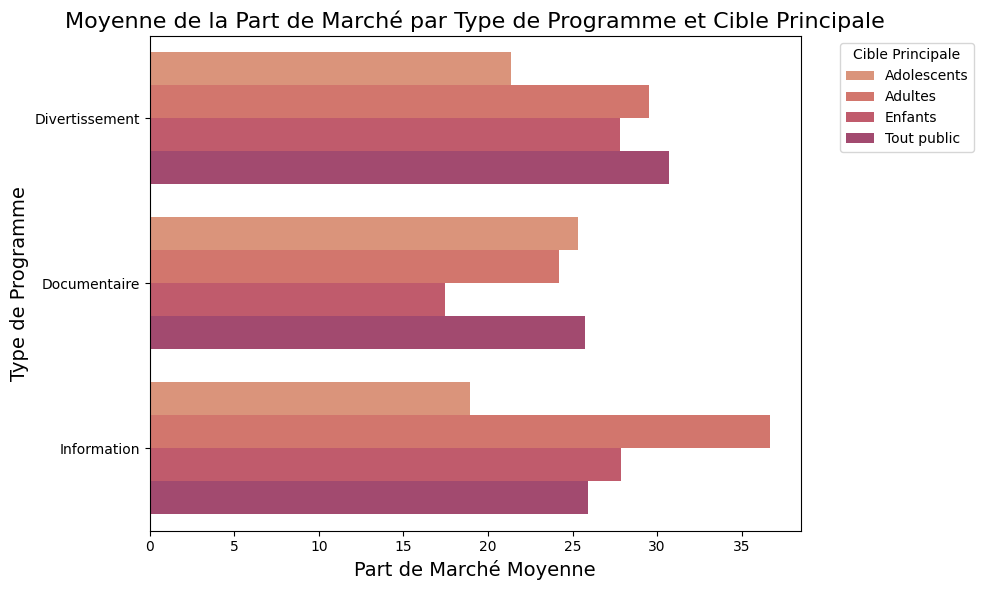

In [189]:
# Créer le graphique en barres
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=mean_part_marche,
    x='Part_marché', 
    y='Type_programme', 
    hue='Cible_principale', 
    palette=palette
)

plt.title('Moyenne de la Part de Marché par Type de Programme et Cible Principale', fontsize=16)
plt.xlabel('Part de Marché Moyenne', fontsize=14)
plt.ylabel('Type de Programme', fontsize=14)

# Afficher la légende en dehors du graphique
plt.legend(title='Cible Principale', bbox_to_anchor=(1.05, 1), loc='upper left')

# Afficher le graphique
plt.tight_layout()
plt.show()

In [194]:
# Tableau croisé qui montre la moyenne de la part de marché par cible principale et type de programme.
tableau_croisé = data.pivot_table(values='Part_marché', index='Cible_principale', columns='Type_programme', aggfunc='mean')
print(tableau_croisé)

Type_programme    Divertissement  Documentaire  Information
Cible_principale                                           
Adolescents             21.36000     25.331818    18.911000
Adultes                 29.52125     24.180000    36.660000
Enfants                 27.82750     17.485714    27.876429
Tout public             30.69600     25.731818    25.940000


<Axes: xlabel='Type_programme,Cible_principale'>

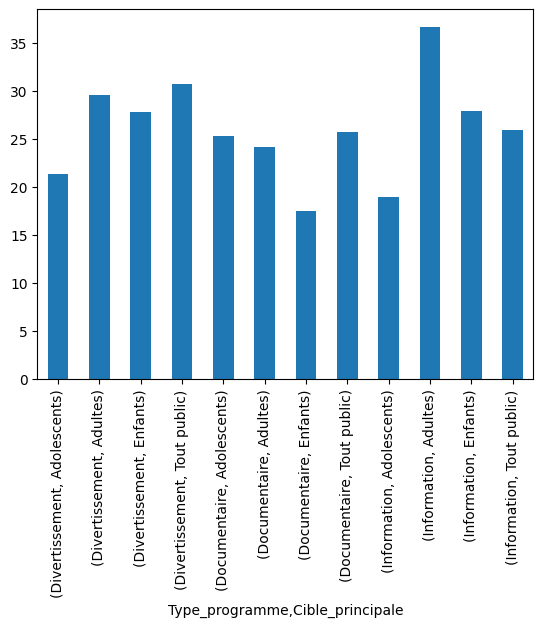

In [193]:
data.groupby(['Type_programme', 'Cible_principale'], observed=True)['Part_marché'].mean().plot(kind="bar")

<div class="alert alert-success">
    <b>Graphiques</b>
</div>

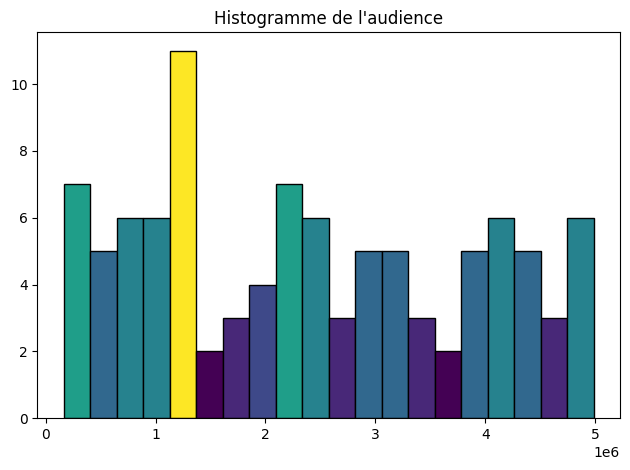

In [195]:
# Histogramme de la distribution de l'audience
import matplotlib.colors as mcolors

fig, ax = plt.subplots(tight_layout=True)

# Création de l'histogramme
N, bins, patches = ax.hist(data['Audience'], bins=20, edgecolor='black')

# Normalisation des fréquences
fracs = N / N.max()

# Normalisation des données pour la colormap
norm = mcolors.Normalize(vmin=fracs.min(), vmax=fracs.max())

# Application des couleurs
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# Affichage du graphique
plt.title("Histogramme de l'audience")
plt.show()

/var/folders/nh/0g4wy8cd033d59_r70qrwqrc0000gn/T/ipykernel_41256/1349572815.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Revenus_publicitaires'], y=data['Type_programme'], palette="viridis")


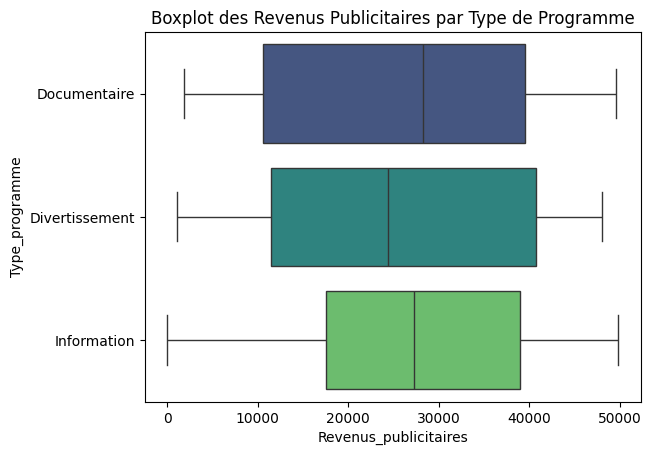

In [196]:
# boxplot des revenus publicitaires par type de programme.
palette = sns.color_palette("flare")
sns.boxplot(x=data['Revenus_publicitaires'], y=data['Type_programme'], palette="viridis")
plt.title("Boxplot des Revenus Publicitaires par Type de Programme")
plt.show()

In [204]:
data['ID_programme'] = data['ID_programme'].astype('category')

In [205]:
df_numerique = data.select_dtypes(include=['float64', 'int64'])

In [206]:
df_numerique.corr().round(2)

,Durée,Audience,Part_marché,Score_qualité,Nombre_publicités,Revenus_publicitaires,Ratio_Audience_Publicité
Durée,1.00,-0.01,-0.17,-0.12,-0.02,-0.08,-0.05
Audience,-0.01,1.00,-0.00,-0.09,-0.16,0.13,0.29
Part_marché,-0.17,-0.00,1.00,-0.18,0.05,-0.09,-0.04
Score_qualité,-0.12,-0.09,-0.18,1.00,0.13,-0.03,-0.07
Nombre_publicités,-0.02,-0.16,0.05,0.13,1.00,-0.18,0.04
Revenus_publicitaires,-0.08,0.13,-0.09,-0.03,-0.18,1.00,-0.52
Ratio_Audience_Publicité,-0.05,0.29,-0.04,-0.07,0.04,-0.52,1.00


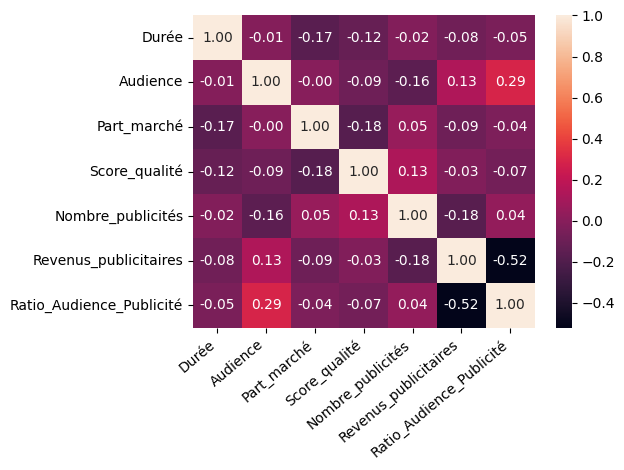

In [207]:
# Création de la heatmap
ax = sns.heatmap(df_numerique.corr(), annot=True, fmt=".2f")

# Ajustement des étiquettes des colonnes en haut
plt.xticks(rotation=40, ha='right')

# Déplacement des labels des colonnes en haut
ax.xaxis.set_label_position('top')

# Ajustement de la disposition pour éviter le chevauchement
plt.tight_layout()

# Affichage de la heatmap
plt.show()

In [209]:
# On remarque que les corrélations présentes sont relativement faibles, sinon presque inexistantes. 
# Nous ne prenons pas en compte celles en rouge et noir car elles sont directement liées au ratio que l'on a caculé.

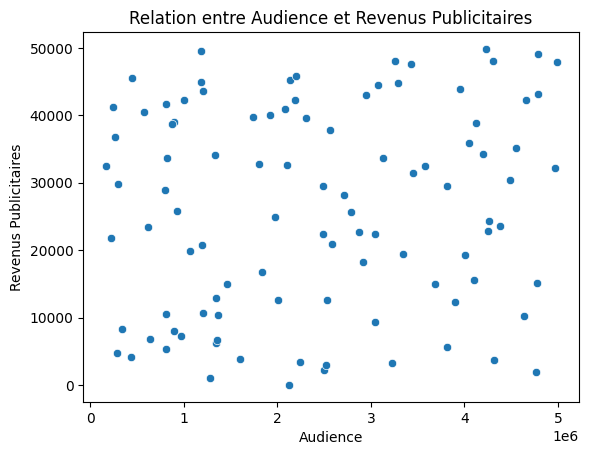

In [197]:
# Nuage de points entre l'audience et les revenus publicitaires.

sns.scatterplot(x='Audience', y='Revenus_publicitaires', data=data)
plt.title('Relation entre Audience et Revenus Publicitaires')
plt.xlabel('Audience')
plt.ylabel('Revenus Publicitaires')
plt.show()